In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Path='/home/mgander/Atlantic/data/Viability/CTPR'

In [ ]:
# Downlaoded from supplement of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3954635/

In [3]:
M=pd.read_excel(f'{Path}/downloaded_data/NIHMS513505-supplement-02 (2).xlsx', sheet_name='TableS2H.viability_scores')

In [4]:
df0=pd.read_excel(f'{Path}/downloaded_data/NIHMS513505-supplement-02 (2).xlsx', sheet_name='TableS2I.compound_information')
df1=pd.read_excel(f'{Path}/downloaded_data/NIHMS513505-supplement-02 (2).xlsx', sheet_name='TableS2J.cell_line_information')

In [5]:
M

,compound_name,cell_line_name,compound_concentration_(uM),percent_viability
0,(-)-gallocatechin-3-monogallate,A2780,2.3125,97
1,(-)-gallocatechin-3-monogallate,A2780,4.6250,90
2,(-)-gallocatechin-3-monogallate,A2780,9.2500,84
3,(-)-gallocatechin-3-monogallate,A2780,18.5000,76
4,(-)-gallocatechin-3-monogallate,A2780,37.0000,42
...,...,...,...,...
258155,ZM336372,WSUDLCL2,21.3980,96
258156,ZM336372,WSUDLCL2,42.7970,82
258157,ZM336372,WSUDLCL2,85.5900,84
258158,ZM336372,WSUDLCL2,171.1800,33


In [5]:
sorted(set(M['compound_name']))

['(-)-gallocatechin-3-monogallate',
 '16-beta-bromoandrosterone',
 '1S,3R-RSL-3',
 '2,4-dideoxy-DC-45-A2',
 '3-chloro-L-alanine',
 '4-methylfasudil',
 'AA-COCF3',
 'ABT-737',
 'ABT-751',
 'AC55649',
 'AG14361',
 'AGK-2',
 'AM-580',
 'ATRA',
 'AZD-7545',
 'B02',
 'BEC',
 'BEZ235',
 'BI-2536',
 'BIBR-1532',
 'BIX-01294',
 'BML-259',
 'BMS-536924',
 'BMS-754807',
 'BRD1429',
 'BRD1812',
 'BRD4132',
 'BRD4354',
 'BRD4770',
 'BRD55319',
 'BRD6340',
 'BRD63610',
 'BRD6368',
 'BRD7137',
 'BRD8958',
 'BRD9876',
 'BX-795',
 'Bax channel blocker',
 'CAY10618',
 'CD-1530',
 'CD-437',
 'CHEMBL1222381',
 'CHEMBL399379',
 'CHIR-99021',
 'CHM-1',
 'CIL41',
 'CIL55A',
 'CIL56',
 'CIL70',
 'CYT-997',
 'Compound 10b',
 'Compound 110',
 'Compound 1541A',
 'Compound 23 citrate',
 'Compound 44',
 'Compound 7d-cis',
 'DC-45-A2',
 'ELCPK',
 'FK866',
 'FQI-1',
 'FQI-2',
 'GMX-1778',
 'GW-405833',
 'GW-843682X',
 'ISOX',
 'JQ-1',
 'KU 0060648',
 'Ko-143',
 'L-685458',
 'LDN-193189',
 'LE-135',
 'LY-2183240',
 

In [6]:
len(sorted(set(M['compound_name'])))

203

In [8]:
len(sorted(set(M['cell_line_name'].astype('str'))))

242

In [11]:
M[['compound_name', 'cell_line_name']].drop_duplicates()

,compound_name,cell_line_name
0,(-)-gallocatechin-3-monogallate,A2780
8,(-)-gallocatechin-3-monogallate,A375
16,(-)-gallocatechin-3-monogallate,AGS
24,(-)-gallocatechin-3-monogallate,AMO1
32,(-)-gallocatechin-3-monogallate,CAL12T
...,...,...
258120,ZM336372,T3M10
258128,ZM336372,THP1
258136,ZM336372,TYKNU
258144,ZM336372,U937


In [12]:
30669/242/203

0.6242926352644221

In [13]:
M['CCL']=M['cell_line_name']
M['Drug']= M['compound_name']
M['Dose']=M['compound_concentration_(uM)']
M['Duration']=72.0
M['Viability']=M['percent_viability']/100
M['Source']='CTPR'

In [14]:
M=M[['CCL', 'Drug', 'Dose', 'Duration', 'Viability', 'Source']]

In [8]:
M.to_pickle(f'{Path}/M.pkl')

In [15]:
M['CCL']=M['CCL'].astype('category')
M['Drug']=M['Drug'].astype('category')
C=pd.crosstab(M['CCL'], M['Drug'])

/tmp/ipykernel_30508/244956815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M['CCL']=M['CCL'].astype('category')
/tmp/ipykernel_30508/244956815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M['Drug']=M['Drug'].astype('category')


In [25]:
C

Drug,(-)-gallocatechin-3-monogallate,16-beta-bromoandrosterone,"1S,3R-RSL-3","2,4-dideoxy-DC-45-A2",3-chloro-L-alanine,4-methylfasudil,AA-COCF3,ABT-737,ABT-751,AC55649,...,tosedostat,tozasertib,triacsin C,triptolide,tyrphostin AG-1478,ubistatin B,ursolic acid,valdecoxib,vorinostat,zebularine
CCL,,,,,,,,,,,,,,,,,,,,,
5637,0,8,0,0,0,0,0,8,8,8,...,0,8,8,0,0,0,0,0,8,0
A2780,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
A375,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
A549,0,24,0,0,0,0,0,24,8,24,...,0,24,24,0,0,0,0,0,24,0
AGS,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U937,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
UMUC3,0,8,0,0,0,0,0,8,8,8,...,0,8,8,0,0,0,0,0,8,0
VMRCLCD,0,8,0,0,0,0,0,8,8,8,...,0,8,8,0,0,0,0,0,8,0


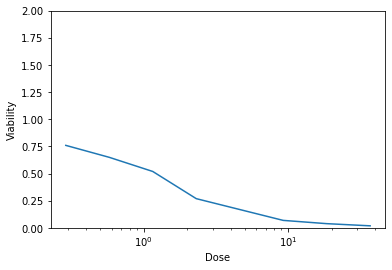

In [21]:
for i in range(100):
    cs=C.sample().T.sample(1)
    if cs.values>3:
        dr=list(cs.index)[0]
        ccl=list(cs.columns)[0]
        Ms=M[(M['CCL']==ccl)&(M['Drug']==dr)].copy()
        sns.lineplot(data=Ms, x='Dose', y='Viability')
        break
plt.ylim(0,2)
plt.xscale('log')

In [ ]:
# Looks good, but it's only 258k points

In [57]:
M

,CCL,Drug,Dose,Duration,Viability,Source
0,A2780,(-)-gallocatechin-3-monogallate,2.3125,72.0,0.97,CTPR
1,A2780,(-)-gallocatechin-3-monogallate,4.6250,72.0,0.90,CTPR
2,A2780,(-)-gallocatechin-3-monogallate,9.2500,72.0,0.84,CTPR
3,A2780,(-)-gallocatechin-3-monogallate,18.5000,72.0,0.76,CTPR
4,A2780,(-)-gallocatechin-3-monogallate,37.0000,72.0,0.42,CTPR
...,...,...,...,...,...,...
258155,WSUDLCL2,ZM336372,21.3980,72.0,0.96,CTPR
258156,WSUDLCL2,ZM336372,42.7970,72.0,0.82,CTPR
258157,WSUDLCL2,ZM336372,85.5900,72.0,0.84,CTPR
258158,WSUDLCL2,ZM336372,171.1800,72.0,0.33,CTPR


In [22]:
258160/30669

8.417620398447944

In [24]:
M[(M['CCL']=='WSUDLCL2')&(M['Drug']=='ZM336372')]

,CCL,Drug,Dose,Duration,Viability,Source
258152,WSUDLCL2,ZM336372,2.6747,72.0,0.97,CTPR
258153,WSUDLCL2,ZM336372,5.3493,72.0,0.93,CTPR
258154,WSUDLCL2,ZM336372,10.6990,72.0,0.83,CTPR
258155,WSUDLCL2,ZM336372,21.3980,72.0,0.96,CTPR
258156,WSUDLCL2,ZM336372,42.7970,72.0,0.82,CTPR
258157,WSUDLCL2,ZM336372,85.5900,72.0,0.84,CTPR
258158,WSUDLCL2,ZM336372,171.1800,72.0,0.33,CTPR
258159,WSUDLCL2,ZM336372,342.3700,72.0,0.01,CTPR
